# **Machine Learning I/II CA**

____

# **Table of Content**

## **Intro**

This CA is going to be on employing algorithim testing two classification models and market basket analysis on the dataset Groceries and descript my rational behind each step taken. data mining famework OSEMN is important to getting an accurcared insights. preparing the data by removing the noise and cleaning any mistakes after the data prepare next step is setting up and fitting the machine learning model that can be supervised and unsupervised learning.

Python Libaries that will be used for Pandas for data Manipulation, Seaborn and Matplotlib for package visualisation. Scipy for statistics and sklearn for building classification, regression, model selection. Numpy as np working with array of numbers. 

_____

In [1]:
import pandas as pd #data manipulation 
import matplotlib.pyplot as plt # plotting graph 
import seaborn as sns # plotting graph
import numpy as np # array of number 

____

# Plan 

Exploratory Data Analysis (EDA) for short this is exploration of the data we are research, trial and error with the goal to gain insights. Using common methods such as CRISP Lifecyclfe for this projects. The Reseacher of this paper is using the dataset groceries given by the lecturer for this assignment. 

the first step of EDA is Know your data. importing this csv and displaying the rows through pandas libary using the import and read functions ``.read_csv()``, ``.head()``, ``.info()``, ``.describe()`` to see the dataset. Missing value can be disruted in making accucary data and cause mistakes  so finding missing values and handling missing data from the dataset is important.

the second step is perform market basket analysis on the data find out the most common item tranactioning and the relationship between two items that are tranacted by the same member and graph the top ten most bought items. using apriori algothims and assication_rules I can achieve this 

The third step is Feature Engineering is about transfering the data into better insight as below i can already at a glance 
see that there is a columns that I could change to improve outcome of of the model List of methods of feature engineering [
Imputation, Handling outliers, Binning, Log transform, One- Hot Encoding Grouping Operation, Feature Split, Scaling Extracting Date] and using various methods depends on the data bring explored. 

The fourth step creating the RandomForest Classifier and KNeighborclassifier these model will be test and trained and accuracy score with the being test for the best paratmeter through hypetuning and try to improve the acauraccy of the model. plotting graphs to visual my finding and  the results 

the fifth step is cross validating the models and using model _selection to compare the models against each other which ever model perform better and the choose for the models was that i want to choose a model that would work well and choose another that wouldnt work as well to see if i can improve the model. I believe the Random Tree Classifer will wrong better Kneighbors. 


# EDA 

In [2]:
df = pd.read_csv("Groceries.csv") #read csv via pandas 
df.head(10) #read top ten row values 

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
5,4941,2015-02-14,rolls/buns,2015,2,14,5
6,4501,2015-08-05,other vegetables,2015,8,5,2
7,3803,2015-12-23,pot plants,2015,12,23,2
8,2762,2015-03-20,whole milk,2015,3,20,4
9,4119,2015-12-02,tropical fruit,2015,12,2,2


In [3]:
df.shape #shape of the dataset

(38765, 7)

Shape of datta set is 38765 elements and 7 columns  

In [4]:
df.info() # type of information in the data  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


This ouput shows the dytyes of each column, names and count. two columns are object(str) and the rest of the columns are int 

In [5]:
df.nunique() #list of unique elements

Member_number      3898
Date                728
itemDescription     167
year                  2
month                12
day                  31
day_of_week           7
dtype: int64

Members are all unique ID 3898, dates have 728 unique values, itemDescription have 167 over 2 year period. 12 month, 31 day and 7 day_of_week are unique 

In [6]:
df.describe() #description of the data include mean, std.

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


describe showns the count, mean, std and quantile range of this dataset 

In [7]:
df.isnull().sum() # no missing value

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

dataset has no missing data, so we dont need perform imputeation to fill in the missing gap

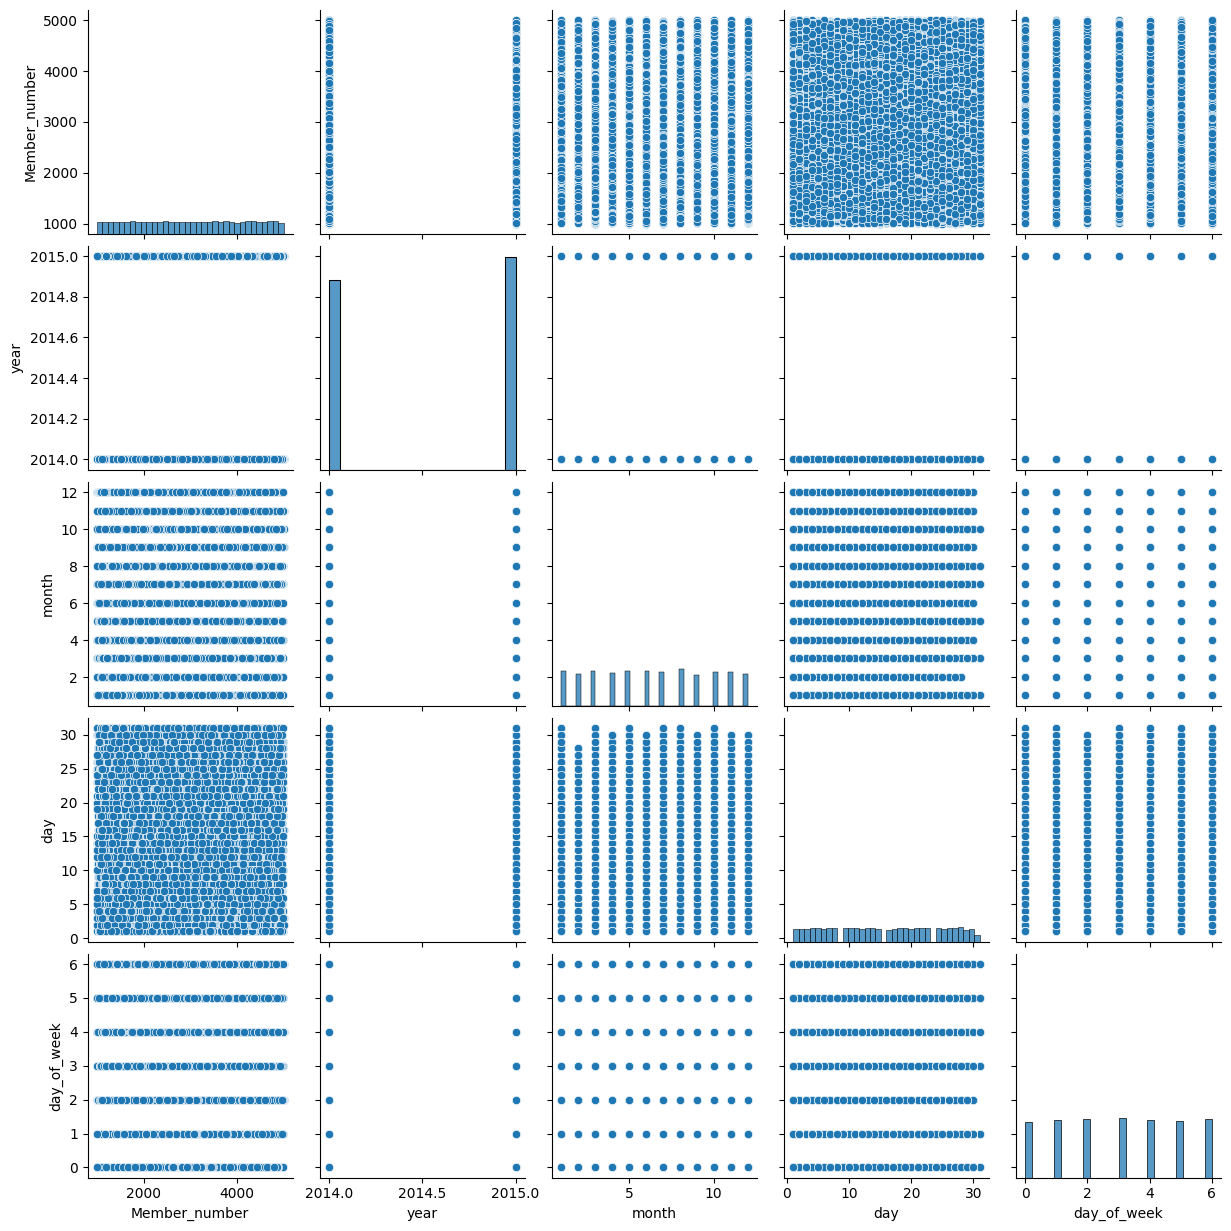

In [8]:
sns.pairplot(df,height = 2.5); #pairplpot for the seaborn libary 

this pairplot shown mutliple charts as we can see there is no outliers to look into, data structure is nicely distribution  

# Market basket Analysis 
___ 

**Market basket Analysis** in Machin learning there are number techniques to use by data analysts/data science just to name a few techniques Random forest to K - nearest neighbor.  techniques used are down to data with the business question trying to answer. 

Step two is to apply **Market Basket Analysis** to this dataset. these techniques are used by large retailers to uncover associations between items it allow retailers to identify relationships between the items that people buy. since this dataset is on groceries. **MBA** is a great data mining techniques to analyze this dataset as you look at the transactions between members and their items in-store or online.  A good explanation is that Amazon leverage this analysis to cross-sell products from this online retailer that will recommend items to you based on your current purchases. 

**Market Basket Analysis** is comprised of Descriptive market basket analysis, Predictive market basket analysis, and Differential market basket analysis. Itemset, Support count, Confidence, Antecedent, Consequent. 

"Using the Apriori is a commonly cited algorithm by the data scientist, it is useful because oof unsupervised learning and requires no training and thus no predictions. it identifies the itemsets that occur frequently in the dataset and pre-specified a threshold value." (Chaudhary, 2023)

"Next, it calculates the confidence of all possible rules. It only keeps those items states that have confidence greater than a pre-specified threshold. it is further classified into three components Support, Lift, and confidence" (Chaudhary, 2023)

___

Displaying all the item to that have been bought from this dataset, this were wew will analysis the data and explore for MBA

In [9]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

Creating a loop function to iterate through the data to find the top ten count item bought by each members  and write into DataFrame and concrated to exacting df, the output is the count on each item.

In [10]:
top_10_items = df['itemDescription'].value_counts()

results = []

for item, count in top_10_items.items(): 
    result = (count)
    results.append(result)
    
count = pd.DataFrame(results)
i =count.rename(columns={0: 'Count_item'})

df_ii = pd.concat([i, df], axis=1)
df_ii['Count_item']

0        2502.0
1        1898.0
2        1716.0
3        1514.0
4        1334.0
          ...  
38760       NaN
38761       NaN
38762       NaN
38763       NaN
38764       NaN
Name: Count_item, Length: 38765, dtype: float64

In [11]:
top_ten = df_ii.groupby('itemDescription').nunique().sort_values('Member_number', ascending=False).head(20)
top_ten

,Count_item,Member_number,Date,year,month,day,day_of_week
itemDescription,,,,,,,
whole milk,19,1786,697,2,12,31,7
other vegetables,9,1468,666,2,12,31,7
rolls/buns,8,1363,649,2,12,31,7
soda,4,1222,617,2,12,31,7
yogurt,2,1103,600,2,12,31,7
tropical fruit,11,911,528,2,12,31,7
root vegetables,5,899,550,2,12,31,7
bottled water,2,833,510,2,12,31,7
sausage,11,803,458,2,12,31,7


Now let get the top ten tranaction in the dataset. again this will output the top ten tranactions for and write into separete df called top_ten_transation for plotting a graphs

In [12]:
top_10_transaction = []

for item, count in top_10_items.items():
    result = (item, count)
    top_10_transaction.append(result)


top_10_transaction = pd.DataFrame(top_10_transaction, columns=['Item', 'Count'])
top_10_transaction = top_10_transaction.head(10)
top_10_transaction

,Item,Count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


Whole milk was purchased @2502 times and other vegetable @1898 times with rolls/buns purchased @1716 times making the top three and down at the bottom three bolttled water @ 933 and sausage @924 and citrus fruits @812 

In [13]:
import plotly.express as px

segments = top_10_transaction

fig = px.pie(segments, 
             values=top_10_transaction['Count'], 
             names=top_10_transaction['Item'],
             title="Most bought Grocies", 
             template='seaborn')
fig.update_traces(rotation=90, textinfo="percent+label")
fig.show()

plotly for graping the top ten we can see clearly the 18.2% of the purchases in this dataset are for milk and other vegetables 13.8% . rolls/buns 12.5%. that adds up to 44.5% of groeries bought by members were these items 

In [14]:
%matplotlib inline 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

basket_plus = (df_ii[df_ii['itemDescription'] <= "whole milk"]
               .groupby(['Member_number', 'itemDescription'])['day_of_week']
               .sum()
               .unstack()
               .reset_index()
               .fillna(0))
basket_plus

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


the basket data has display every each individual transaction from itemDesrciption, every tranaction now has features of every product that could be bought. DataFrame basket plus that has shape odf 3898 x 166 columns involved all columns eithier have 0 for not transacting particular product  or 1 for the transaction buying product using data from df_ii select['itemDescription'] == "whole milk", I group the tranaction by **Single _transaction** and **ItemDescription** showing the day of week it would be purchased. after that I sum up the value and unstack it 

In [15]:
def encode_units(x): 
    if x <= 0: 
        return 0
    if x >= 1:
        return 1

basket_encode_plus = basket_plus.applymap(encode_units)

basket_encode_plus

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3894,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Encoding the data into binary to see the if more that one item was purchased per member and the relationship between items for example a member that would by milk more likely to purchase bread we will explore this soon 

In [16]:
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >= 2].drop(columns={'Member_number'})

basket_filter_plus

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Filter the data we want to uncover the assoication bettween 2 or more types of item that is bought. Any single tranaction doesnt help to run valid analysis between the relationship between items 

In [17]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.415040,(whole milk),1
1,0.343742,(other vegetables),1
2,0.313297,(rolls/buns),1
3,0.277387,(soda),1
4,0.210513,(tropical fruit),1
...,...,...,...
241,0.030445,"(pastry, whole milk, rolls/buns)",3
242,0.030445,"(whole milk, bottled water, soda)",3
243,0.030445,"(tropical fruit, newspapers)",2
244,0.030185,"(whipped/sour cream, sausage)",2


Single item have a higher support value such as whole milk 0.41%  and grouped items have a 0.03% so the min support is going 3% for the apriori algorithm. as you can see the Whole milk is the most frequent bought item. 246 items are frequently bought in this dataset. Whole milk with support value 0.415% of 3843 1575.63 transation

In [18]:
association_rules(frequent_itemsets_plus, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(whole milk, other vegetables)",(bottled water),0.158470,0.188915,0.042675,0.269294,1.425477,0.012738,1.110002,0.354688
1,(bottled water),"(whole milk, other vegetables)",0.188915,0.158470,0.042675,0.225895,1.425477,0.012738,1.087101,0.368002
2,"(rolls/buns, other vegetables)",(sausage),0.120999,0.186053,0.032006,0.264516,1.421728,0.009494,1.106683,0.337463
3,(sausage),"(rolls/buns, other vegetables)",0.186053,0.120999,0.032006,0.172028,1.421728,0.009494,1.061631,0.364435
4,(root vegetables),(fruit/vegetable juice),0.205048,0.109550,0.031746,0.154822,1.413259,0.009283,1.053566,0.367841
...,...,...,...,...,...,...,...,...,...,...
449,(rolls/buns),(pork),0.313297,0.115275,0.037471,0.119601,1.037535,0.001356,1.004915,0.052682
450,(newspapers),(other vegetables),0.124122,0.343742,0.044236,0.356394,1.036807,0.001570,1.019658,0.040532
451,(other vegetables),(newspapers),0.343742,0.124122,0.044236,0.128690,1.036807,0.001570,1.005243,0.054096
452,(dessert),(whole milk),0.075722,0.415040,0.032266,0.426117,1.026688,0.000839,1.019301,0.028124


Applying Association rules to see what most freqent bought item were most likelty to be sold together from the assoiation results we can see that bottled water and other vegetables/whole milk  have the highest assioation with hightest lift and it is safe to say all items have a lift of more than 1 and that can be seen as enough edvince for the to be assoicated 

The sopport value of bottled water and other vegetable/whole milk have support value 0.042765 from the confidence score whole milk  and desert score the highest confidence suggest that when member bought desert that they likely whole milk. 

# Features/encoding for classification
____

for classification model will need to encoded numeric labels for categriocal data, we have seven columns and two columns arent numerical value being the items and the date. there are many ways to encode ctegorical variables  into numric. various methods like One-hot/dummmy encoding, Label/ Ordinal encoding, target encoding. Frequency/ count encoding , Binay encoding, Feature Hashing. 

Choose to use the label/ ordinal Encoding such as this dataset we have the items in a string converting them into a numerical vaule, so Whole milk will be assigned 1 and buns/rolls will be assigned 2 ad so on. in the itemdesription column 167 items have been converted before we create are model classifier 

In [19]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder() # label encoder 
itemDes_fit = enc.fit(df['itemDescription']) #fit item description
itemDes_labels = enc.transform(df['itemDescription']) #tranforming the item to numerial
itemDes_mappings = {index: label for index, label in 
                  enumerate(enc.classes_)} # mapping the labels 

df['itemLabel'] = itemDes_mappings

from sklearn libary preprocessing setup the LabelEncoder to the itemdesription column and mappng the to a itemlabel if I chose to use this as a target value for the classification model 

In [20]:
df['itemLabel'] = itemDes_labels #writing new columns into df 
df = df.drop(columns={'Date'}) #dropping date columns 

df.replace('<', '', inplace=True) #replace < from item label


Item mapping saved the labels as string convert to numrcial values using itemDes_labels. dropping date column cause we has day , month and year column and that will make the model less complexs. find values '<' so replace the with "" how many values now have been changed to Nan  in the ItemLabel we dont know. so to not allow this to shew the data i will runn a simpleImputer 

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer the mean of the missing value 
imputer.fit(df['itemLabel'].values.reshape(-1,1)) # fit the imputer to the column and reshape as to 2D array 
df_imputed_mean = imputer.transform(df['itemLabel'].values.reshape(-1, 1)) #transform imputer in the item column
itemLabel_mean = df_imputed_mean[...,0] #itemLabel

df['itemLabel'] = itemLabel_mean #itemlabel mean add to column


SimpleImputer is method use to fill in the blank of missing data, by importing this into we can correctly using the mean of a columns to fill in the gaps from replace "<" with blanks and we will us the data in the itemlabel column this is effetive method to use when missing data so you can predicted and train models effectivly 

In [35]:
features = df[['Member_number','itemLabel', 'year', 'month', 'day', 'day_of_week' ]] #feature for test-train split 

labels = features['month'] #Labels are the value we want to predict 

features = features.drop(['month'], axis = 1) #remove labels from the feature 

feature_list = list(features.columns) # Saving feature names  for later use

labels.astype(int)

0         7
1         5
2         9
3        12
4         1
         ..
38760     8
38761     2
38762     4
38763     3
38764    12
Name: month, Length: 38765, dtype: int32

After using all columns as target value, the most effective results came from day_of_week and month column, deciding to go with month as target value with the rest being features for traning this model 

### train/test split df for models of classification 

Training a model on the training data and then evlauating the accuracy on testing data to see if the model is any good. or needs to fine tuned. the decision to uses a test size of 67% of the data to train and evaluate this on test data to see if this model is accuracy. it is a good sample size to train to idenify the best values and create maximum value from predicts  

In [36]:
 from sklearn.model_selection import train_test_split

RSEED = 50 #Random Seed
train_features,test_features, train_labels , test_labels  = train_test_split(features, labels, test_size=0.33
, random_state=RSEED) #training and test features 



# Random Forest Model 

"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree."(SCIKIT-LEARN, 2023)

th adavantage of random forest classifier is it simple to compute and can be difficult to overfitting,this is why I chosen to use this classifier 

In [37]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,  
                               random_state=RSEED, 
                               max_features= 'sqrt',
                               n_jobs=-1, verbose= 1);

model.fit(train_features, train_labels);
n_node = []
max_depths = []

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


model consists of n_estimators = 100 the amount of tree, random_state= RSEED set @50 , max_feature ='sqrt', n_jons the number jobs runing parrell usaing - 1 means using all processors when computing. vrbose control the fitting and predicting along with n_nodes and max depth for each forest 

In [38]:
for ind_tree in model.estimators_: 
    n_node.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_node))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 18606
Average maximum depth 42


Print the average number of nodes in this model and max depth 

In [64]:
print("Accuracy on test data: {:.2f}".format(model.score(train_features, train_labels)))

Accuracy on test data: 1.00


Accuray on test data 100% cannot be right so i am going to verify this through a different method to double check. 100% are rare accurary 

In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats =3, random_state=1)
n_scores = cross_val_score(model, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.705 (0.008)


this method display more of a realistic result of how the model with perform accuray of the classifier will have around 71% and std of 8% 

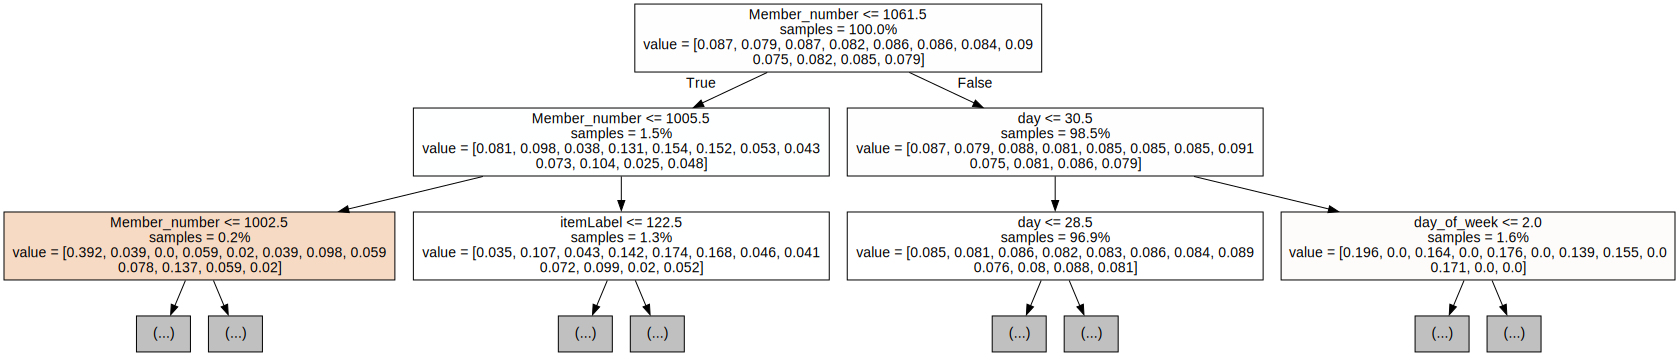

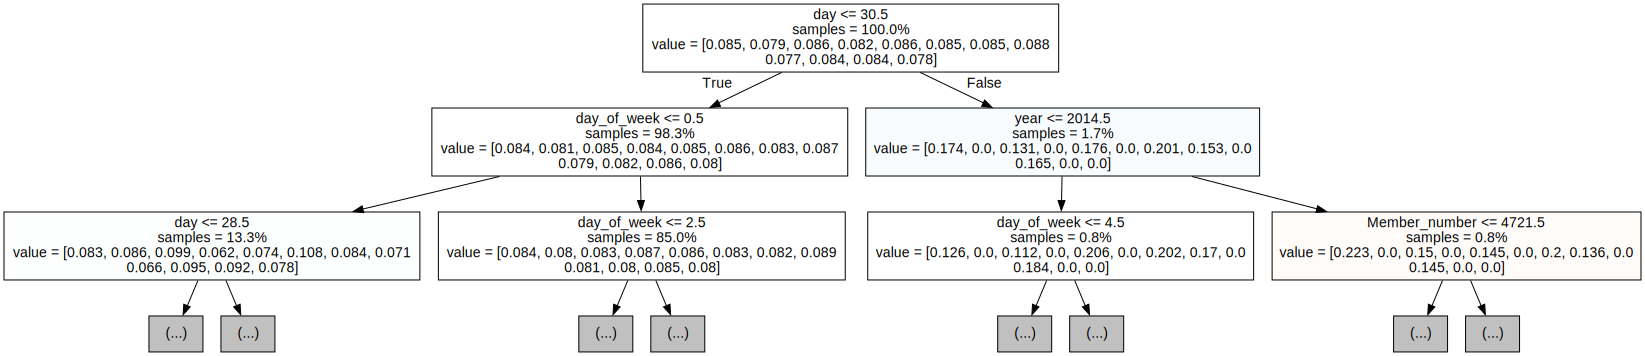

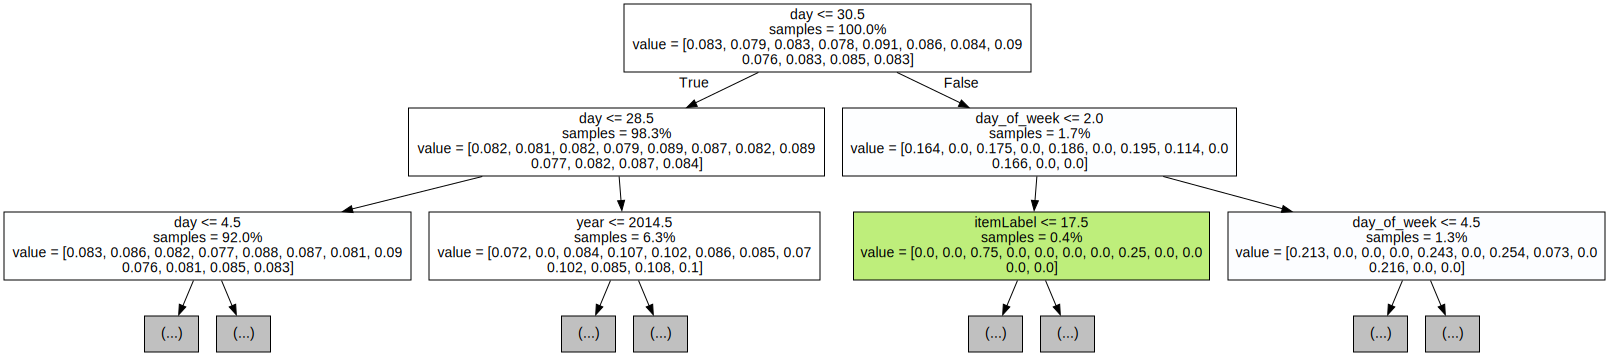

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_list,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

developed graph of a decision tree to viusals the trees as wecan see by the graph days and day_the_week has high sample score and member_number and itemsLabel have low scores with this model predicts on days and day_of_week  members could go shopping would be high accuracy and what member buy they model wouldnt be so sucessfull 

In [42]:
grid_parms = {
    'n_estimators' : [5, 10, 40, 100], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': range(1,5,1), 
    'min_samples_leaf': range(2,5, 1), 
    'min_samples_split': range(2, 5, 1), 
    'max_features' : ['auto', 'log2']
}

Hypeturning this model to see if you get more of accauary result, its important evaluate results an  fine tune to get best results in machine learning, I have built grid_params, i want to search to see the beat the current model score in accurary   

In [ ]:
def perform_grid_search(train_features, train_labels, param_grid, model): 
    grid_search = GridSearchCV(estimator= model, param_grid = grid_parms, cv=  5, n_jobs =1, verbose = 0)
    grid_search.fit(train_features,  train_labels)

    best_params = grid_search.best_params_
    print(f'Best Parameters', best_params)

    return best_params

best_params = perform_grid_search(train_features, train_labels, grid_parms, model);

built a funtion to search for the best params to train are model 

In [44]:
print("best_params :", best_params)

best_params : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


the seacrh has stated that best_params : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}: 

I will built a model with these parameters and evaluate this perform of the model against the current score of 71% 

In [66]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4 ,max_features='sqrt', min_samples_leaf=4, min_samples_split=2)

clf.fit(train_features, train_labels)



RandomForestClassifier(max_depth=4, min_samples_leaf=4)

max_feature was set at 'sqrt' as auto is removed from pandas libary, warning when running the line of code appeared hence the change 

In [67]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats =3, random_state=1)
n_scores = cross_val_score(clf, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.151 (0.009)


hypertuning this model didnt work as well we didnt improve on 71% infact the model with this params are getting worse score. 15% and std is up .01 from the original score 

In [47]:
print("Accuracy on test data: {:.2f}".format(clf.score(train_features, train_labels)))

Accuracy on test data: 0.16


In [48]:
train_rf_predictions = model.predict(train_features)
train_rf_probs = model.predict_proba(train_features)[:,1]

rf_predictions = model.predict(test_features)
rf_probs = model.predict_proba(test_features)[:,1]




[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


using model.predict amd proba test an training data These predictions and probabilities can be used for further analysis or evaluation of the random forest model's performance. we will use them chart out to confusion matrix to create visual an f1 report and classification 

Confusion matrix, without normalization
[[ 750    2    0   13   14    3    3    3    3  326    0    1]
 [   1  514  204    3    5    3    1    5    5    1  228    4]
 [   2  220  609    0    4   15    2   11    0    2  220    2]
 [  12    2    1  707    5    4  322    1    2    7    1    6]
 [   7    0    4    4 1049    1    3   29    2   13    4    1]
 [   2    2    5    2    1 1052    3    8    9    5    5    7]
 [  10    0    1  286    3    5  747    2    5    8    0    4]
 [   1   16   13    1    7    2    1 1108    2    0   20    1]
 [   5    1    4   19    1    4   12    8  640    7    0  275]
 [ 312    0    1    6   12    1    2    0    2  669    2    1]
 [   0  253  235    2    1    9    1    9    2    2  567    2]
 [   6    2    2   16    1   22   11    3  277    3    3  670]]


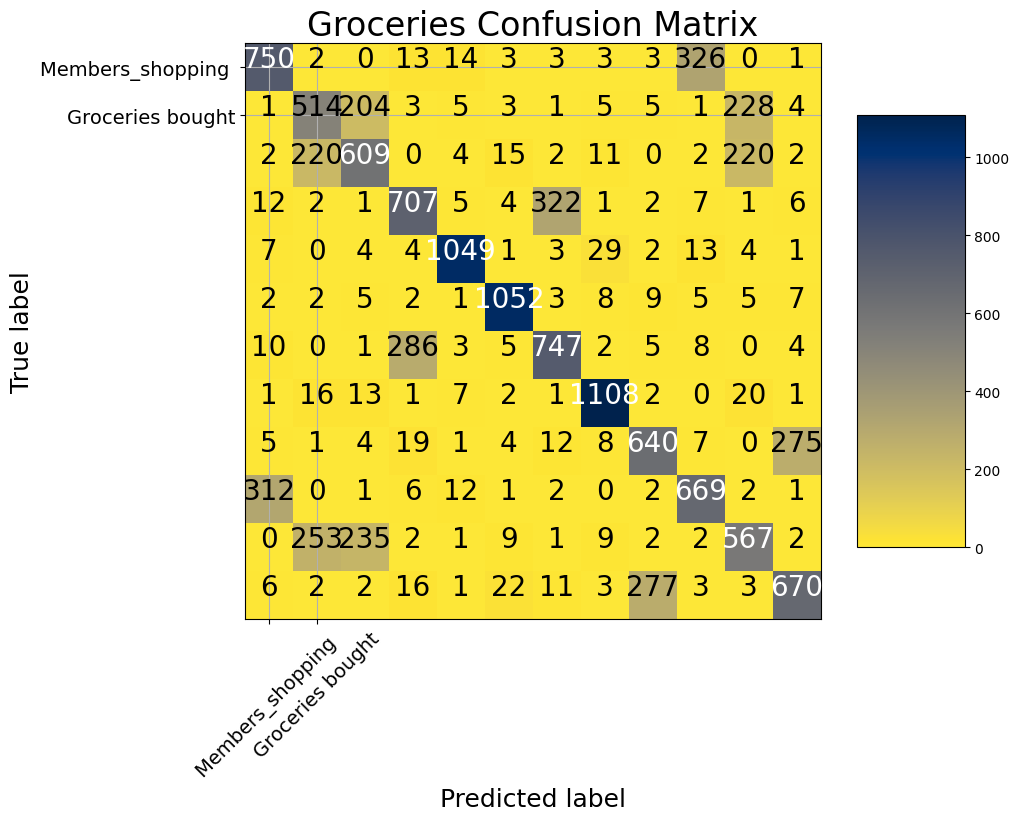

In [70]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Groceries matrix',
                          cmap=plt.cm.cividis_r):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions )
plot_confusion_matrix(cm, classes = ['Members_shopping ', 'Groceries bought'],
                      title = 'Groceries Confusion Matrix')


In [50]:
from sklearn.metrics import classification_report

def performance_report(cm):
    col = len(cm)
    
    arr = cm.tolist()


    cr = dict()
    support_sum = 0
    
    macro = [0]*3
    
    weighted = [0]*3
    for i in range(col): 
        vertical_sum = sum([arr[j][i] for j in range(col)]) 
        horizontal_sum = sum(arr[i])
        p = arr[i][i] / vertical_sum
        r = arr[i][i] / horizontal_sum
        f = (2 * p * r) / horizontal_sum
        s = horizontal_sum
        row=[p,r,f,s]
        support_sum +=s 
        for j in range(3):
            macro[j]+=row[j]
            weighted[j]+=row[j]*s 
        cr[i]=row
    truepos=0
    total=0
    for i in range(col):
        truepos+=arr[i][i]
        total+=sum(arr[i])
  
    cr['Accuracy']=["", "", truepos/total, support_sum]
  
    # Add macro-weight and weighted_avg features.
    macro_avg=[Sum/col for Sum in macro]
    macro_avg.append(support_sum)
    cr['Macro_avg']=macro_avg
  
    weighted_avg=[Sum/support_sum for Sum in weighted]
    weighted_avg.append(support_sum)
    cr['Weighted_avg']=weighted_avg
  
    # print the classification_report
    print("Performance report of the model is :")
    space,p,r,f,s=" ","Precision","Recall","F1-Score","Support"
    print("%13s %9s %9s %9s %9s\n"%(space,p,r,f,s))
    stop=0
    for key,value in cr.items():
        if stop<col:
            stop+=1
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
        elif stop==col:
            stop+=1
            print("\n%13s %9s %9s %9.2f %9d"%(key,value[0],
                                              value[1],
                                              value[2],
                                              value[3]))
        else:
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,
                                                value[0],
                                                value[1],
                                                value[2],
                                                value[3]))       
            return cr 

def main():
    model = RandomForestClassifier().fit(train_features, train_labels)
    y_pred = rf_predictions
    classes = list(feature_list)
    cr=performance_report(cm)
    print("\nClassification report method=\n",classification_report(test_labels, y_pred))
    
if __name__ == '__main__':
    main()

Performance report of the model is :
              Precision    Recall  F1-Score   Support

            0      0.68      0.67      0.00      1118
            1      0.51      0.53      0.00       974
            2      0.56      0.56      0.00      1087
            3      0.67      0.66      0.00      1070
            4      0.95      0.94      0.00      1117
            5      0.94      0.96      0.00      1101
            6      0.67      0.70      0.00      1071
            7      0.93      0.95      0.00      1172
            8      0.67      0.66      0.00       976
            9      0.64      0.66      0.00      1008
           10      0.54      0.52      0.00      1083
           11      0.69      0.66      0.00      1016

     Accuracy                          0.71     12793
    Macro_avg      0.70      0.70      0.00     12793

Classification report method=
               precision    recall  f1-score   support

           1       0.68      0.67      0.67      1118
          

Precision is ratio of true positive prediction 70%. 
Recall is the ability for the model to find all positive instanes, scoring 70% 
f1-score is the mean of precision-recalll, 71% 

The classification report provides a detailed breakdown of precision, recall, F1-score, and support for each class individually.


# K-Nearest Neighbors
_____

"Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point."(SCIKIT-LEARN, 2023)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #standard scale
features = scaler.fit_transform(features) #scaling features


Standard scaler is common requirement for ML methods that need the data to not look more important than the other so I will have to scale all features in before i use K nearest neighbors 

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

neigh = KNeighborsClassifier(n_neighbors = 5).fit(train_features, train_labels)

Pred_y = neigh.predict(test_features)

print("accuracy_score at 5 =", metrics.accuracy_score(test_labels, Pred_y),'%')

accuracy_score at 5 = 0.13147815211443759 %


K nearest Neighbours algothrim use the method of nearest value to the target to match the predit it hihly used and effective model for data. n_neigh = 5 so the accuracy will to data point to the nearest 5 neighbors in values, I can compute any into the n_neigh if i put 1 instead of five, the algorithm will only search for closest neighbor in the data 

Text(0, 0.5, 'accuracy_score')

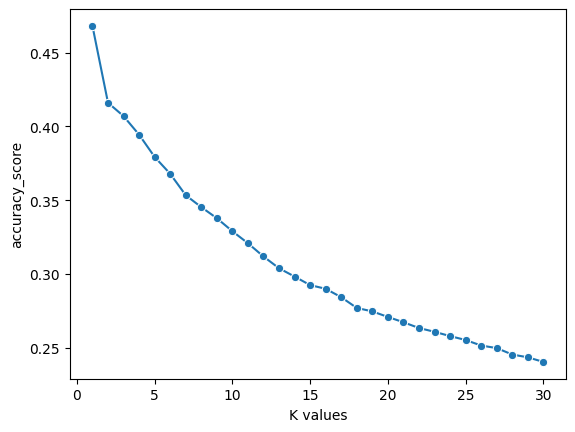

In [53]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, test_features, Pred_y, cv=5)
    scores.append(np.mean(score))
    

sns.lineplot(x = k_values, y = scores, marker='o')
plt.xlabel('K values')
plt.ylabel("accuracy_score")

Searching for best values to uses predict knn alogortithm range from 1 to 31 computing each of their perform with graphs as you can see there is a drop off in perform as we select the higher k value to predict. show the modrls doesnt work nas well with this dataset its cardinal is a problem 

Minimum error:- 0.8161494567341515 at K = 0


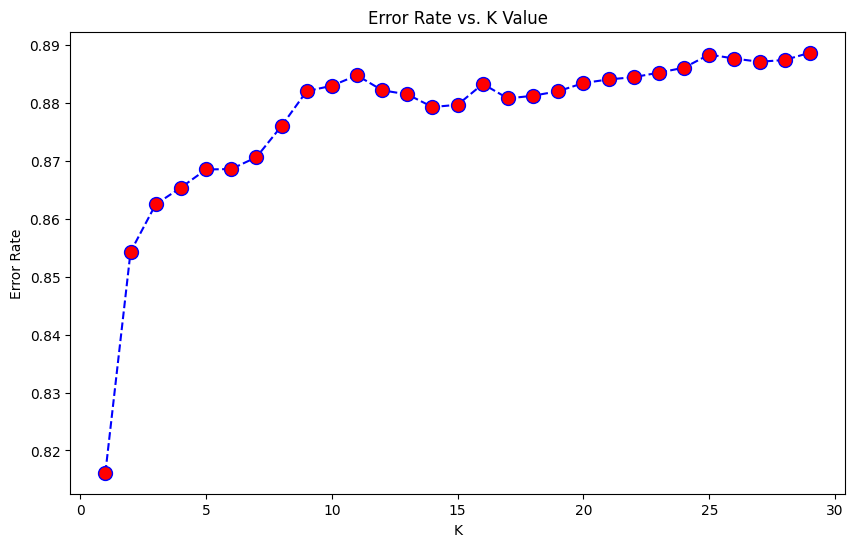

In [54]:
error_rate = []
for i in range(1,30): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features, train_labels)
    pred_i = knn.predict(test_features)
    error_rate.append(np.mean(pred_i != test_labels))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

error rates for k nearest neighbor minimum 81%  that is to high to be consider this as a effective model will need either hypetuned this model and she if we can get a better score with sugguested 18% acccuray and the random forest coming in at 71% this model is seem to be a less effective one 

Maximum accuracy:- 0.18385054326584852 at K = 0


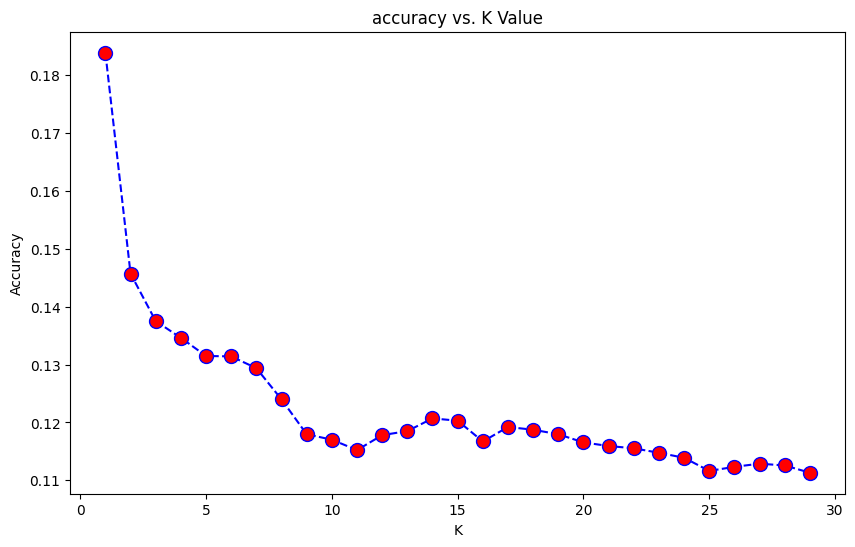

In [55]:
acc =[]

for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors= i).fit(train_features, train_labels)
    yhat = neigh.predict(test_features)
    acc.append(metrics.accuracy_score(test_labels, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


Accuary range from 1 to 31 k_value, after the first k value their is a hugh drop of in accuray. the range of Accuary 18% - 11%. 

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(test_features, test_labels)

y_pred = knn.predict(test_features)

accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(test_labels, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00       974
           3       1.00      1.00      1.00      1087
           4       1.00      1.00      1.00      1070
           5       1.00      1.00      1.00      1117
           6       1.00      1.00      1.00      1101
           7       1.00      1.00      1.00      1071
           8       1.00      1.00      1.00      1172
           9       1.00      1.00      1.00       976
          10       1.00      1.00      1.00      1008
          11       1.00      1.00      1.00      1083
          12       1.00      1.00      1.00      1016

    accuracy                           1.00     12793
   macro avg       1.00      1.00      1.00     12793
weighted avg       1.00      1.00      1.00     12793



Precision is ratio of true positive prediction 100%. 
Recall is the ability for the model to find all positive instanes, scoring 100% 
f1-score is the mean of precision-recalll, 100% 

The classification report provides a detailed breakdown of precision, recall, F1-score, and support for each class individually.
macro avg: 100% 
weighted avg: 100: 

this above should happen the it should either have stronger result than the previous model. but not a complete 100% score 


# Comparing Random Forest and K-Nearest Neighbors
____ 

In this section will be comparing the Random Forest and K-nearest neighbors, evaluating the models and cross validation is important to justify why you have choosen this method and why this is stronger in performance

RFC: 0.707108 (0.007753)
KNN: 0.173340 (0.006962)


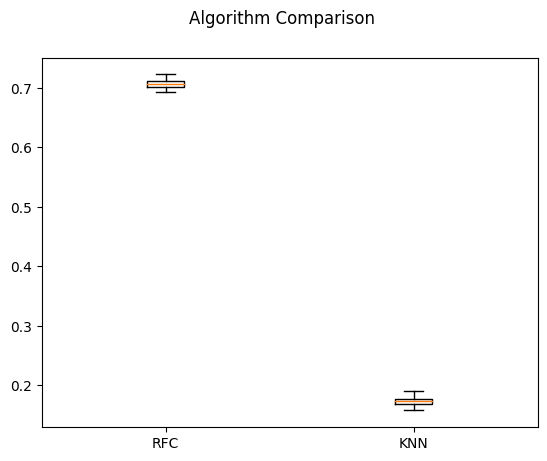

In [57]:
from sklearn import model_selection

models = []
results = []
names = []
scoring ='accuracy'

models.append(('RFC', RandomForestClassifier( 
max_features= 'sqrt',
n_jobs=-1, verbose= 1)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))



for name, model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats =3, random_state=1)
    cv_results = model_selection.cross_val_score(model, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    results.append(cv_results)
    names.append(name)
    
    scores = "%s: %f (%f)" % (name, np.mean(cv_results), np.std(cv_results))
    print(scores)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

two models, RandomForest and Kn Neighbors classifier models results are loop the models and cross validation strategy with 10 splits and repeats 3 times. model _selection to cross val_score each model appended to results of the final sore of the model and the print function on each score RFC is 70% and KNN 17%. box plot graph to visual all results  

In [58]:
for name, model in models: 
    model.fit(train_features, train_labels)
    pred = model.predict(test_features)
    print(name)
    print(accuracy_score(test_labels, pred))
    print(classification_report(test_labels, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


RFC
0.7040569061205346
              precision    recall  f1-score   support

           1       0.66      0.66      0.66      1118
           2       0.51      0.54      0.52       974
           3       0.57      0.55      0.56      1087
           4       0.67      0.64      0.65      1070
           5       0.95      0.93      0.94      1117
           6       0.93      0.95      0.94      1101
           7       0.65      0.69      0.67      1071
           8       0.94      0.95      0.95      1172
           9       0.66      0.65      0.65       976
          10       0.63      0.66      0.64      1008
          11       0.54      0.52      0.53      1083
          12       0.67      0.65      0.66      1016

    accuracy                           0.70     12793
   macro avg       0.70      0.70      0.70     12793
weighted avg       0.70      0.70      0.70     12793

KNN
0.18385054326584852
              precision    recall  f1-score   support

           1       0.18      0.

Based on the provided output, it seems that the RandomForestClassifier model achieved better performance compared to the KNeighborsClassifier model, as indicated by higher precision, recall, and F1-scores, as well as a higher overall accuracy. 

RFC: Precision 70%  Recall 70% f1 score 70%

Knn precision 18% Recall 18% f1 score 18%



Text(0.5, 23.52222222222222, 'Predicted label')

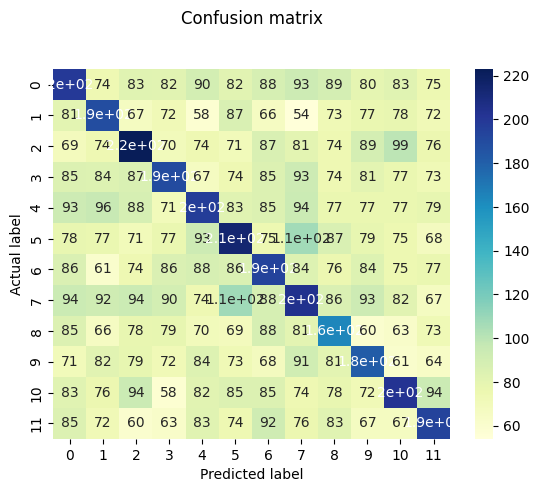

In [85]:
cnf_matrix = metrics.confusion_matrix(test_labels, pred)
g = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='.2g',)

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conlussion 

this Assessment on ML classification models and market asket Analysis has improved my skill on building funtion to use for construction models and appling various methods to improvement on analysis. market basket analysis is really useful tool for mutliple industry involved in transaction. with the classifier method one had really good performance RFC Compared to KNN so you can quickly see the algorithm difference in performance. 

# Appendix 
___

In [60]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(train_features, train_labels)

y_pred = lg_model.predict(test_features)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1118
           2       0.08      0.20      0.12       974
           3       0.21      0.00      0.01      1087
           4       0.00      0.00      0.00      1070
           5       0.11      0.33      0.16      1117
           6       0.09      0.07      0.08      1101
           7       0.10      0.02      0.04      1071
           8       0.09      0.35      0.14      1172
           9       1.00      0.00      0.00       976
          10       0.08      0.11      0.09      1008
          11       0.00      0.00      0.00      1083
          12       0.00      0.00      0.00      1016

    accuracy                           0.09     12793
   macro avg       0.15      0.09      0.05     12793
weighted avg       0.14      0.09      0.05     12793



c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 i

In [61]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(train_features, train_labels)

y_pref = nb_model.predict(test_features)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1118
           2       0.08      0.20      0.12       974
           3       0.21      0.00      0.01      1087
           4       0.00      0.00      0.00      1070
           5       0.11      0.33      0.16      1117
           6       0.09      0.07      0.08      1101
           7       0.10      0.02      0.04      1071
           8       0.09      0.35      0.14      1172
           9       1.00      0.00      0.00       976
          10       0.08      0.11      0.09      1008
          11       0.00      0.00      0.00      1083
          12       0.00      0.00      0.00      1016

    accuracy                           0.09     12793
   macro avg       0.15      0.09      0.05     12793
weighted avg       0.14      0.09      0.05     12793



c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\glenn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [62]:
""""from sklearn.svm import SVC

svm_model = SVC() 
svm_model = svm_model.fit(train_features, train_labels)

y_pred = svm_model.predict(test_features)
print(classification_report(test_labels, y_pred))""""

SyntaxError: unterminated string literal (detected at line 7) (1496423163.py, line 7)

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}

    baseline['recall'] = recall_score(test_labels, 
                                    [1 for _ in range(len(test_labels))], average='micro')
    baseline['precision'] = recall_score(test_labels, 
                                    [1 for _ in range(len(test_labels))],average='micro')
    baseline['roc'] = 0.5

    results = {}

        
    results['recall'] = recall_score(test_labels, predictions, average='micro')
    results['precision'] = precision_score(test_labels, predictions, average='micro')
    results['roc'] = roc_auc_score(test_labels, probs, multi_class='ovo')
        

    train_results = {}

    train_results['recall'] = recall_score(train_labels, train_predictions, average='micro')
    train_results['precision'] = precision_score(train_labels, train_predictions, average='micro', )
    results['roc'] = roc_auc_score(train_labels, probs, multi_class='ovo')

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    base_fpr, base_tpr, _ = roc_curve(train_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(train_labels, rf_probs)

    plt.figure(figsize=(8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label='baseline')
    plt.plot(model_fpr, model_tpr, 'r', label='model')

    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
TE = TransactionEncoder()
array = TE.fit_transform(records['itemDescription'].apply(lambda x: [x]))
r
r = pd.DataFrame(array, columns = TE.columns_)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Bibliography
BROWNLEE, J., 2016. How to Implement Random Forest From Scratch in Python. [Online] 
Available at: https://machinelearningmastery.com/implement-random-forest-scratch-python/
[Accessed 07 06 2023].
Chaudhary, S., 2023. Market Basket Analysis: Anticipating Customer Behavior. [Online] 
Available at: https://www.turing.com/kb/market-basket-analysis
[Accessed 11 06 2023].
Chauhan, A., 2021. Random Forest Classifier and its Hyperparameters. [Online] 
Available at: https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6
[Accessed 07 06 2023].
DESIGN, V., 2020. How to Handle Missing Data. [Online] 
Available at: https://www.visual-design.net/post/how-to-address-missing-data
[Accessed 03 06 2023].
GONG, D., 2022. Top 6 Machine Learning Algorithms for Classification. [Online] 
Available at: https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
[Accessed 03 06 2023].
KOEHRSEN, W., 2017. Random Forest in Python. [Online] 
Available at: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
[Accessed 27 12 2023].
Patil, P., 2022. Last Minute Revision: Part I - Machine Learning & Statistics. [Online] 
Available at: https://medium.com/@theprasadpatil/last-minute-revision-part-i-machine-learning-statistics-8de23a377987
[Accessed 03 05 2023 ].
Pintusaini, 2023. Compute Classification Report and Confusion Matrix in Python. [Online] 
Available at: https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/
[Accessed 07 06 2023].
RENCBEROGLU, E., 2019. Fundamental Techniques of Feature Engineering for Machine Learning. [Online] 
Available at: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
[Accessed 03 06 2023].
SARKAR, D. (., 2018. Categorical Data. [Online] 
Available at: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
[Accessed 04 06 2023].
SHAFI, A., 2023. Random Forest Classification with Scikit-Learn. [Online] 
Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python
[Accessed 07 06 2023].



___